# Audio Steganograpghy
----------

In [82]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq, fftshift
import numpy as np
import IPython.display as ipd
from scipy.signal import resample_poly
from fractions import Fraction

In [83]:
def filterHighFreq(signalData):
    dataAfterFilterFt = fft(signalData)
    for i in range(1*int(dataAfterFilterFt.size/8),7*int(dataAfterFilterFt.size/8)):
        dataAfterFilterFt[i]=0
        
    return ifft(dataAfterFilterFt).real

def our_resample(audio_data, old_rate, new_rate):
    ratio = Fraction(new_rate, old_rate)
    return resample_poly(audio_data, ratio.numerator, ratio.denominator)


## Preparing
---

### Reading the audio files

In [67]:
rate2, data2 = wav.read("audio2.wav")
data2 = filterHighFreq(data2)

total_samples2 = len(data2)
sample_spacing2 = 1/rate2
duration2 = total_samples2*sample_spacing2 # seconds



ipd.Audio(data2, rate=rate2) # Audio player

In [85]:
rate1, data1 = wav.read("audio1.wav")



total_samples1 = len(data1)
sample_spacing1 = 1/rate1
duration1 = total_samples1*sample_spacing1 # seconds

data1 = our_resample(data1,rate1,rate2)

rate1=rate2
total_samples1 = len(data1)
sample_spacing1 = 1/rate1
duration1 = total_samples1*sample_spacing1 # seconds

data1 = filterHighFreq(data1)


ipd.Audio(data1, rate=rate1) # Audio player

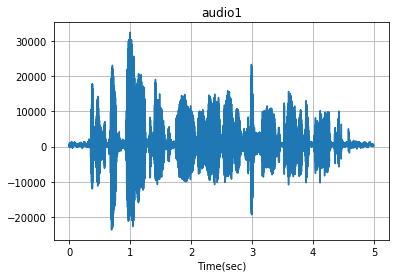

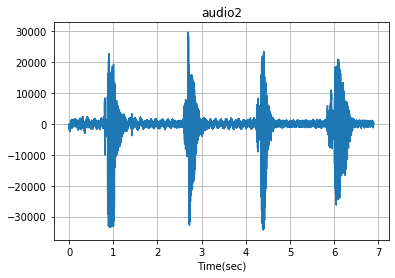

In [86]:
plt.title("audio1")
x1 = np.linspace(0, duration1, total_samples1)
plt.plot(x1, data1)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

plt.title("audio2")
x2 = np.linspace(0, duration2, total_samples2)
plt.plot(x2, data2)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

### Fourier transform

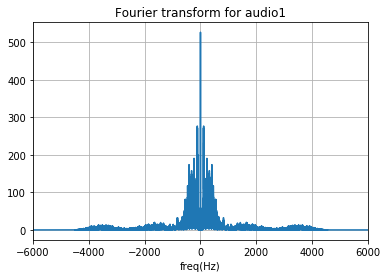

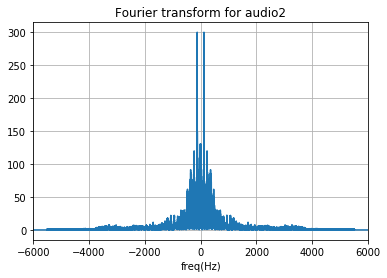

In [87]:
ft1 = fft(data1)
y_ft1 = 1/total_samples1 * np.abs(fftshift(ft1))
x_ft1 = fftfreq(total_samples1, sample_spacing1)
x_ft1 = fftshift(x_ft1)

ft2 = fft(data2)
y_ft2 = 1/total_samples2 * np.abs(fftshift(ft2))
x_ft2 = fftfreq(total_samples2, sample_spacing2)

x_ft2 = fftshift(x_ft2)

plt.title("Fourier transform for audio1")
plt.plot(x_ft1, y_ft1)
plt.xlabel('freq(Hz)')
plt.xlim(-6000,6000)
plt.grid()
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.xlabel('freq(Hz)')
plt.xlim(-6000,6000)
plt.grid()
plt.show()



## Hiding "audio1" in "audio2"
---

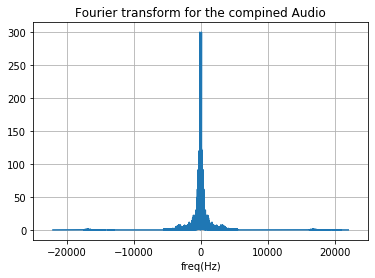

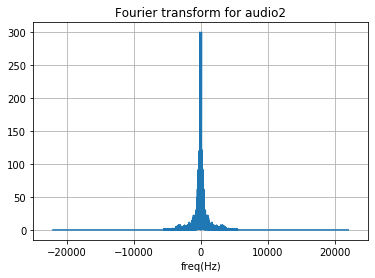

In [88]:

omega = 2.4
attenuationFactor = 0.01

data3 = np.array(data2)

for i in range(data1.size):
    data3[i] =data2[i]+ attenuationFactor* data1[i] * np.cos(i*omega)


    
ft3 = fft(data3)
y_ft3 = 1/total_samples2 * np.abs(fftshift(ft3))
x_ft3 = fftfreq(total_samples2, sample_spacing2)
x_ft3 = fftshift(x_ft3)

plt.title("Fourier transform for the compined Audio")
plt.plot(x_ft3, y_ft3)
plt.xlabel('freq(Hz)')
plt.xlim(-25000,25000)
plt.grid()
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.xlabel('freq(Hz)')
plt.xlim(-25000, 25000)
plt.grid()
plt.show()




---

In [89]:
ipd.Audio(data3, rate=rate1) # Audio player

In [90]:
wav.write('audio3.wav', int(rate1), (data3).astype(np.int32)) # exporting the audio file

## Restore audio

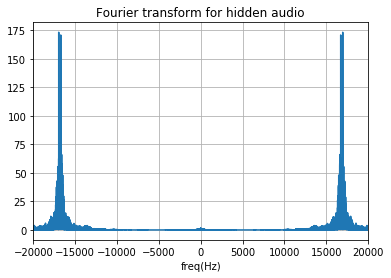

In [91]:
combinedMessageRate , combinedMessage = wav.read("audio3.wav")

hiddenAudio = np.array(combinedMessage)

for i in range(data3.size):
    hiddenAudio[i] = hiddenAudio[i]*np.cos(i*omega)
    
    
hiddenAudioFt = fft(hiddenAudio)
y_hiddenAudioFt = 1/total_samples2 * np.abs(fftshift(hiddenAudioFt))
x_hiddenAudioFt = fftfreq(total_samples2, sample_spacing2)
x_hiddenAudioFt = fftshift(x_hiddenAudioFt)


plt.title("Fourier transform for hidden audio")
plt.plot(x_hiddenAudioFt, y_hiddenAudioFt)
plt.xlabel('freq(Hz)')
plt.xlim(-20000, 20000)
plt.grid()
plt.show()



## apply filter and amplify signal

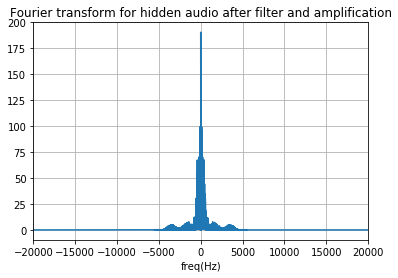

In [92]:
hiddenAudioAfterFilter = filterHighFreq(hiddenAudio/attenuationFactor)
hiddenAudioAfterFilterFt= fft(hiddenAudioAfterFilter)

y_hiddenAudioAfterFilterFt = 1/total_samples2 * np.abs(fftshift(hiddenAudioAfterFilterFt))
x_hiddenAudioAfterFilterFt = fftfreq(total_samples2, sample_spacing2)
x_hiddenAudioAfterFilterFt = fftshift(x_hiddenAudioAfterFilterFt)


plt.title("Fourier transform for hidden audio after filter and amplification")
plt.plot(x_hiddenAudioAfterFilterFt, y_hiddenAudioAfterFilterFt)
plt.xlabel('freq(Hz)')
plt.xlim(-20000, 20000)
plt.grid()
plt.show()

hiddenAudioAfterFilter = np.fft.ifft(hiddenAudioAfterFilterFt).real



In [93]:
ipd.Audio(hiddenAudioAfterFilter, rate=rate2) 

In [23]:
wav.write('hiddenMessage.wav', int(rate2), (hiddenAudioAfterFilter).astype(np.int16))